#Dataset

In [25]:
import pandas as pd

data = pd.read_csv('/content/iris.csv')

print("Dataset Preview:")
data.head()


Dataset Preview:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Check for Missing Values and Dataset Info



In [26]:
print("Missing values in each column:")
print(data.isnull().sum())

print("\nDataset Information:")
data.info()

print("\nDataset Description:")
data.describe()


Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Dataset Description:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Visualization

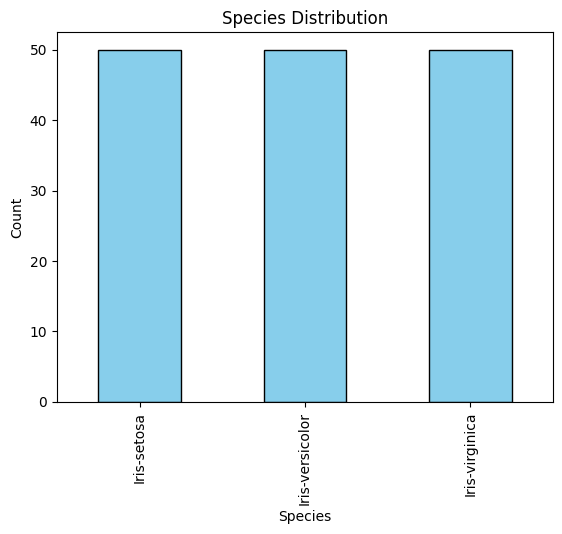

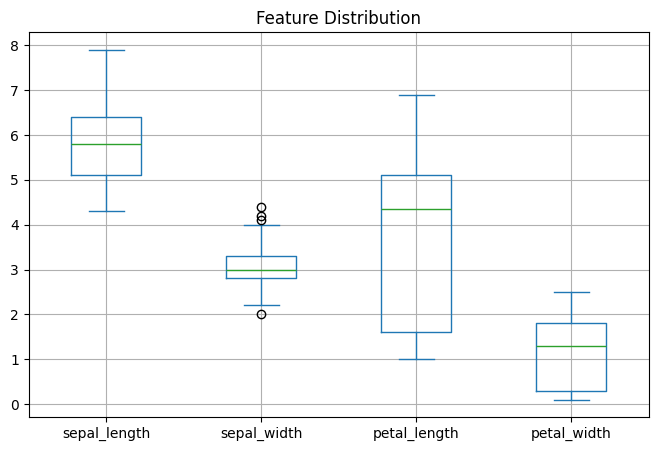

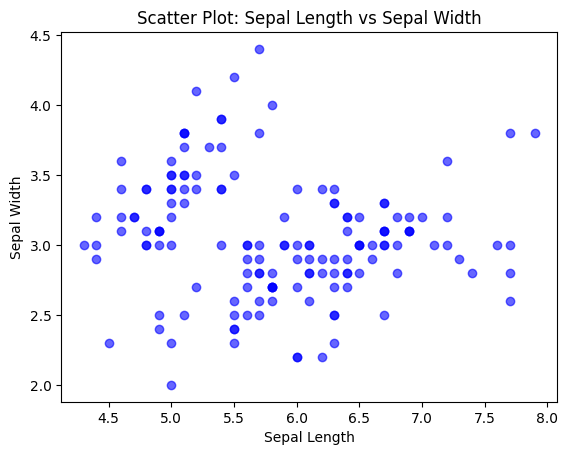

In [31]:
import matplotlib.pyplot as plt

data['species'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

data.drop('species', axis=1).plot(kind='box', figsize=(8, 5), title="Feature Distribution", grid=True)
plt.show()

plt.scatter(data['sepal_length'], data['sepal_width'], c='blue', alpha=0.6)
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


#Data Preprocessing and Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

X = data.drop('species', axis=1)
y = data['species']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Encoded Labels:")
print(dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Encoded Labels:
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


#Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (105, 4)
Testing set size: (45, 4)


#Balancing the Dataset

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class distribution after balancing:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after balancing:
1    35
0    35
2    35
Name: count, dtype: int64


#Scaling and Normalizing

In [35]:
scaler = StandardScaler()
X_train_scaled_balanced = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train_scaled_balanced)
X_test_normalized = normalizer.transform(X_test_scaled)

print("Normalized Balanced Training Features (First 5 Rows):")
print(X_train_normalized[:5])


Normalized Balanced Training Features (First 5 Rows):
[[0.22222222 0.20833333 0.32758621 0.41666667]
 [0.52777778 0.08333333 0.5862069  0.58333333]
 [0.22222222 0.75       0.06896552 0.08333333]
 [0.69444444 0.5        0.82758621 0.91666667]
 [0.38888889 0.33333333 0.51724138 0.5       ]]


#Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_normalized, y_train_balanced)

y_pred_log = log_reg.predict(X_test_normalized)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))



Logistic Regression Accuracy: 0.8666666666666667

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      0.80      0.80        15
           2       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45


Logistic Regression Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  3 12]]


#Naive Bayes Model

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_normalized, y_train_balanced)

y_pred_nb = nb.predict(X_test_normalized)

print("\nNaive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))



Naive Bayes Accuracy: 0.9111111111111111

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Naive Bayes Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


#Compare Results

In [38]:
print("Comparison of Model Accuracies:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Comparison of Model Accuracies:
Logistic Regression Accuracy: 0.8666666666666667
Naive Bayes Accuracy: 0.9111111111111111
